<span style="font-size: 40px; color: Red">Problem Statement</span>


## Problem Definition
* The goal of this project is to develop a class attendance predictor for gym classes, leveraging historical attendance data and relevant features. The predictor will assist gym management in estimating the number of participants likely to attend a given class. By utilizing machine learning techniques, the project aims to provide accurate attendance predictions that can facilitate resource allocation, class scheduling, and overall gym operation optimization.


## Data Source
https://www.kaggle.com/datasets/nithilaa/fitness-analysis

<span style="font-size: 30px; color: Green">Importing Libaries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import joblib

<span style="font-size: 30px; color: Green">Loading the Dataset</span>

In [2]:
df = pd.read_csv("Crowdedness_at_Campus_Gym.csv")

<span style="font-size: 30px; color: Green">Data Preprocessing</span>

### a). Data Inspection

In [3]:
df.head(3)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17


In [4]:
# rows and columns( or no. of records)
df.shape

(62184, 11)

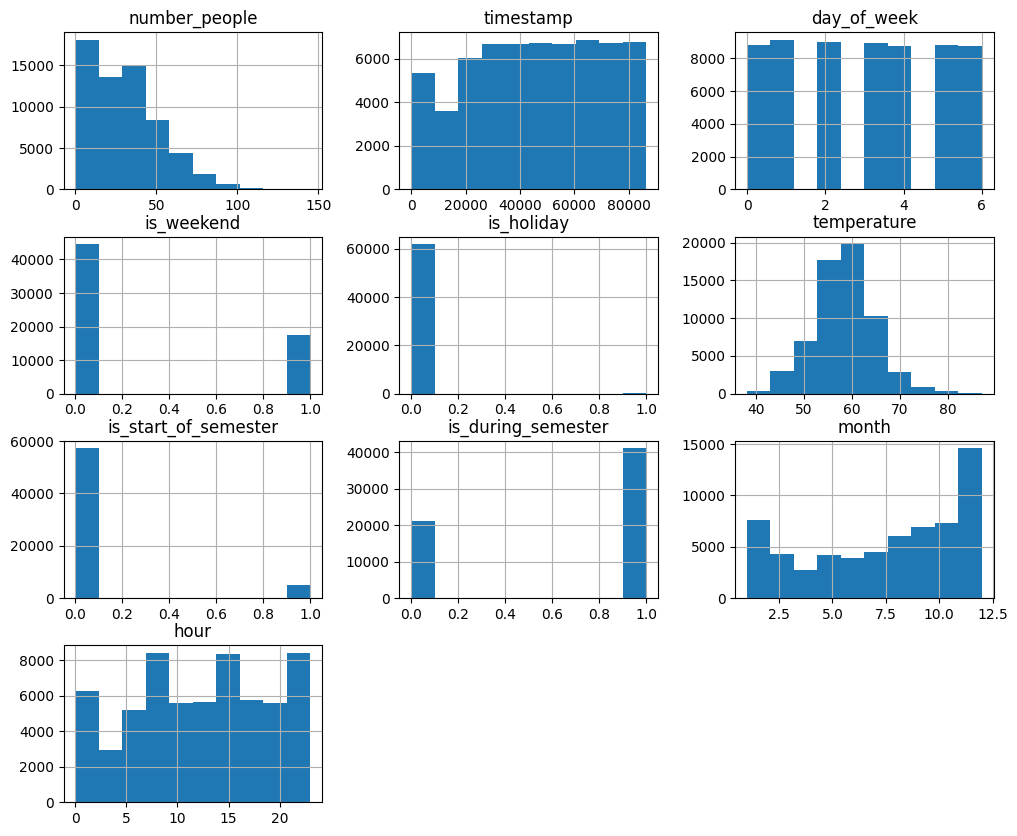

In [5]:
df.hist(figsize=(12, 10))
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [7]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


### b). Data Cleaning

In [8]:
# Checking for dublicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [10]:
df.head(2)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17


### C). Feature Engineering

In [4]:
# Column Year consisting of Year alone
df['Year'] = df['date'].str[:4]

# Column Date consisting of Date of the month alone
df['Date'] = df['date'].str[8:11]

# Column Time
df['minutes'] = df['date'].str[14:-9]

In [5]:
df["Year"].unique()

array(['2015', '2016', '2017'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
 11  Year                  62184 non-null  object 
 12  Date                  62184 non-null  object 
 13  minutes               62184 non-null  object 
dtypes: float64(1), int64(9), object(4)
memory usage: 6.6+ MB


In [14]:
df.head(2)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,Year,Date,minutes
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,2015,14,00
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,2015,14,20


In [6]:
# Drop columns
df = df.drop(columns=["date","timestamp"], axis=1)

In [7]:
df.head(2)

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,Year,Date,minutes
0,37,4,0,0,71.76,0,0,8,17,2015,14,00
1,45,4,0,0,71.76,0,0,8,17,2015,14,20


In [7]:
# Rearrange the columns
columns = ["Year", "month", "Date", "day_of_week", "hour", "minutes", "temperature", "is_weekend", "is_holiday", "is_start_of_semester", "is_during_semester", "number_people"]
df = df[columns]

In [8]:
# Rename columns
df.columns = [cols.capitalize() for cols in df.columns]

In [10]:
df.head(2)

,Year,Month,Date,Day_of_week,Hour,Minutes,Temperature,Is_weekend,Is_holiday,Is_start_of_semester,Is_during_semester,Number_people
0,2015,8,14,4,17,00,71.76,0,0,0,0,37
1,2015,8,14,4,17,20,71.76,0,0,0,0,45


In [9]:
df.shape

(62184, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  62184 non-null  object 
 1   Month                 62184 non-null  int64  
 2   Date                  62184 non-null  object 
 3   Day_of_week           62184 non-null  int64  
 4   Hour                  62184 non-null  int64  
 5   Minutes               62184 non-null  object 
 6   Temperature           62184 non-null  float64
 7   Is_weekend            62184 non-null  int64  
 8   Is_holiday            62184 non-null  int64  
 9   Is_start_of_semester  62184 non-null  int64  
 10  Is_during_semester    62184 non-null  int64  
 11  Number_people         62184 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.7+ MB


<span style="font-size: 30px; color: Green">Encode categorical variables</span>

In [22]:
# label encoding for year, since this column has an ordinal r/ship(In order)
# label_encoder = LabelEncoder()
# df["Year"] = label_encoder.fit_transform(df["Year"])

In [10]:
# Converting Date and Minutes columns as int datatype
df["Date"] = df["Date"].astype(int)
df["Minutes"] = df["Minutes"].astype(int)
df["Year"] = df["Year"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  62184 non-null  int64  
 1   Month                 62184 non-null  int64  
 2   Date                  62184 non-null  int64  
 3   Day_of_week           62184 non-null  int64  
 4   Hour                  62184 non-null  int64  
 5   Minutes               62184 non-null  int64  
 6   Temperature           62184 non-null  float64
 7   Is_weekend            62184 non-null  int64  
 8   Is_holiday            62184 non-null  int64  
 9   Is_start_of_semester  62184 non-null  int64  
 10  Is_during_semester    62184 non-null  int64  
 11  Number_people         62184 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.7 MB


In [11]:
df_2015 = df[(df["Year"] == 2015)]
df_2015.shape

(13569, 12)

In [14]:
df_2016 = df[(df["Year"] == 2016)]
df_2016.shape

(45547, 12)

In [15]:
df_2017 = df[(df["Year"] == 2017)]
df_2017.shape

(3068, 12)

In [16]:
df_2017.to_csv("newdf.csv", index=False)

In [17]:
# reload
df = pd.read_csv("newdf.csv")
df.head(2)

,Year,Month,Date,Day_of_week,Hour,Minutes,Temperature,Is_weekend,Is_holiday,Is_start_of_semester,Is_during_semester,Number_people
0,2017,1,1,6,0,1,48.37,1,0,0,0,0
1,2017,1,1,6,0,11,48.37,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3068 non-null   int64  
 1   Month                 3068 non-null   int64  
 2   Date                  3068 non-null   int64  
 3   Day_of_week           3068 non-null   int64  
 4   Hour                  3068 non-null   int64  
 5   Minutes               3068 non-null   int64  
 6   Temperature           3068 non-null   float64
 7   Is_weekend            3068 non-null   int64  
 8   Is_holiday            3068 non-null   int64  
 9   Is_start_of_semester  3068 non-null   int64  
 10  Is_during_semester    3068 non-null   int64  
 11  Number_people         3068 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 287.8 KB


In [19]:
features = df.drop(columns=["Number_people"])
target = df["Number_people"]

<span style="font-size: 30px; color: Green">Data Scaling and Normalization</span>

In [20]:
# Using Normalization since the data have outliers
# Normalizing all the columns except the target column
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [21]:
# Concatenate the scaled features with the target column
final_df = pd.concat([scaled_features_df, target], axis=1)

In [22]:
final_df.head(2)

,Year,Month,Date,Day_of_week,Hour,Minutes,Temperature,Is_weekend,Is_holiday,Is_start_of_semester,Is_during_semester,Number_people
0,0.0,0.0,0.0,1.0,0.0,0.016949,0.215356,1.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.186441,0.215356,1.0,0.0,0.0,0.0,0


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3068 non-null   float64
 1   Month                 3068 non-null   float64
 2   Date                  3068 non-null   float64
 3   Day_of_week           3068 non-null   float64
 4   Hour                  3068 non-null   float64
 5   Minutes               3068 non-null   float64
 6   Temperature           3068 non-null   float64
 7   Is_weekend            3068 non-null   float64
 8   Is_holiday            3068 non-null   float64
 9   Is_start_of_semester  3068 non-null   float64
 10  Is_during_semester    3068 non-null   float64
 11  Number_people         3068 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 287.8 KB


In [24]:
final_df["Number_people"].unique()

array([ 0,  1,  2,  3,  5,  6,  7, 12, 13, 19, 10, 16,  9,  8, 11, 14, 15,
       18, 17, 20, 22, 30, 21, 25, 29, 24, 28,  4, 23, 34, 32, 41, 27, 38,
       33, 42, 31, 35, 26, 36, 37, 40, 45, 47, 39, 53, 50, 43, 52, 51, 44,
       46, 48, 55, 79, 54, 49, 88, 66, 58, 64])

In [25]:
final_df.to_csv("final_df.csv", index=False)

<span style="font-size: 30px; color: Green">Reload the Dataset</span>

In [2]:
df = pd.read_csv("final_df.csv")
df.head(2)

,Year,Month,Date,Day_of_week,Hour,Minutes,Temperature,Is_weekend,Is_holiday,Is_start_of_semester,Is_during_semester,Number_people
0,0.0,0.0,0.0,1.0,0.0,0.016949,0.215356,1.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.186441,0.215356,1.0,0.0,0.0,0.0,0


In [4]:
df = df.drop(["Year"], axis=1)

In [3]:
df = df.drop(["Day_of_week"], axis=1)

<span style="font-size: 30px; color: Green">Data Splitting</span>

In [5]:
# Training and Testing data
X = df.drop(["Number_people"], axis=1)

# Target column
y = df["Number_people"]

In [6]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Furter split for validation and testing data
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

<span style="font-size: 30px; color: Green">Model Selection and Training</span>

## Simple Linear Regression

In [35]:
# Simple Linear Regression on Day_of_week
X_train_ind_var = X_train["Temperature"].values.reshape(-1, 1)
X_test_ind_var = X_test["Temperature"].values.reshape(-1, 1)

# fit model on training data
slr_model = LinearRegression()
slr_model.fit(X_train_ind_var, y_train)

# predict on testing data
slr_y_pred = slr_model.predict(X_test_ind_var)

### SLR Model evaluation

In [36]:
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, slr_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, slr_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, slr_y_pred)}")

Mean Squared Error(MSE): 183.05421757873057
Mean Absolute Error(MAE): 11.770466089207309
R2_Score(R-Squared Score): 0.16871390928757235


In [37]:
# Simple Linear Regression on Temperature
X_train_ind_var = X_train["Temperature"].values.reshape(-1, 1)
X_test_ind_var = X_test["Temperature"].values.reshape(-1, 1)

# fit model on training data
slr_model = LinearRegression()
slr_model.fit(X_train_ind_var, y_train)

# predict on testing data
slr_y_pred = slr_model.predict(X_test_ind_var)

print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, slr_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, slr_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, slr_y_pred)}")

Mean Squared Error(MSE): 183.05421757873057
Mean Absolute Error(MAE): 11.770466089207309
R2_Score(R-Squared Score): 0.16871390928757235


In [38]:
# Simple Linear Regression on Hour
X_train_ind_var = X_train["Hour"].values.reshape(-1, 1)
X_test_ind_var = X_test["Hour"].values.reshape(-1, 1)

# fit model on training data
slr_model = LinearRegression()
slr_model.fit(X_train_ind_var, y_train)

# predict on testing data
slr_y_pred = slr_model.predict(X_test_ind_var)

print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, slr_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, slr_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, slr_y_pred)}")

Mean Squared Error(MSE): 150.5596790312184
Mean Absolute Error(MAE): 10.01883797111018
R2_Score(R-Squared Score): 0.31627815706049167


## Multiple Linear Regression

In [39]:
mlr_model = LinearRegression()

# fit the model on training data
mlr_model.fit(X_train, y_train)

# Predict on testing data
mlr_y_pred = mlr_model.predict(X_test)

### MLR Model Evaluation

In [40]:
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, mlr_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, mlr_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, mlr_y_pred)}")

Mean Squared Error(MSE): 81.19595518223387
Mean Absolute Error(MAE): 6.8339297652836075
R2_Score(R-Squared Score): 0.6312728050853535


## Polynomial Regression

In [41]:
poly_ft = PolynomialFeatures()

# Transform input features to poly features
X_train_poly = poly_ft.fit_transform(X_train)
X_test_poly = poly_ft.transform(X_test)

# fit on Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# predict on testing data
poly_y_pred = lr_model.predict(X_test_poly)

### PR Model Evaluation

In [42]:
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, poly_y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, poly_y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, poly_y_pred)}")

Mean Squared Error(MSE): 54.961760801300834
Mean Absolute Error(MAE): 5.472596682632396
R2_Score(R-Squared Score): 0.7504075684269096


## Ridge regression (L2 regularization)

In [43]:
ridge = Ridge()
# fit the model on training data
ridge.fit(X_train, y_train)
# predict the model on testing data
y_ridge_pred = ridge.predict(X_test)

### L2 Model Evaluation

In [44]:
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_ridge_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_ridge_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_ridge_pred)}")

Mean Squared Error(MSE): 81.50570455858802
Mean Absolute Error(MAE): 6.849116593023612
R2_Score(R-Squared Score): 0.6298661707473094


## Lasso Regression(L1 regularization)

In [45]:
lasso = Lasso()
# fit the model on training data
lasso.fit(X_train, y_train)
# predict the model on testing data
y_lasso_pred = lasso.predict(X_test)

### L1 Model Evaluation

In [46]:
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_lasso_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_lasso_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_lasso_pred)}")

Mean Squared Error(MSE): 115.3937315763826
Mean Absolute Error(MAE): 8.873775544732963
R2_Score(R-Squared Score): 0.4759738110180748


## Support Vector Regression (SVR)

In [47]:
svr = SVR()
# fit the model on training data
svr.fit(X_train, y_train)
# predict the model on testing data
y_svr_pred = svr.predict(X_test)

# model evaluation
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_svr_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_svr_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_svr_pred)}")

Mean Squared Error(MSE): 66.19676157990219
Mean Absolute Error(MAE): 5.983007561568739
R2_Score(R-Squared Score): 0.6993871658383828


## Decision Tree Regression

In [48]:
dtree = DecisionTreeRegressor()

# fit the model on training data
dtree.fit(X_train, y_train)

# predict the model on testing data
y_dtree_pred = dtree.predict(X_test)

# model evaluation
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_dtree_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_dtree_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_dtree_pred)}")

Mean Squared Error(MSE): 34.4771986970684
Mean Absolute Error(MAE): 3.8420195439739415
R2_Score(R-Squared Score): 0.8434320929465888


## Random Forest Regression

In [56]:
rfr = RandomForestRegressor()
# fit the model on training data
rfr.fit(X_train, y_train)
# predict on testing data
y_rfr_pred = rfr.predict(X_test)

# model evaluation
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_rfr_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_rfr_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_rfr_pred)}")

Mean Squared Error(MSE): 22.897928032520326
Mean Absolute Error(MAE): 3.131886178861789
R2_Score(R-Squared Score): 0.8943509438740419


<span style="font-size: 30px; color: Green">Model Validation and Tuning</span>

### Random Forest Regression- Grid Search

In [50]:
# Hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Model
model = RandomForestRegressor()
# Grid Search Object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
# Fit on Training Data
grid_search.fit(X_train, y_train)
# best hyperparameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_ 
# Best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Squared Error (MSE): {best_score}")
print(f"Mean Squared Error(MSE) on Test Data: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_pred)}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Mean Squared Error (MSE): 26.118002825111745
Mean Squared Error(MSE) on Test Data: 22.747189234073037
Mean Absolute Error(MAE): 3.1546595735452
R2_Score(R-Squared Score): 0.8967004297240212


### Random Forest Regression Randomized Search

In [8]:
# Hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Model
model = RandomForestRegressor()
# RRandomized Search Object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=cv, random_state=42)
# Fit on Training Data
random_search.fit(X_train, y_train)
# best hyperparameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_ 
# Best model
best_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Squared Error (MSE): {best_score}")
print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_pred)}")

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best Mean Squared Error (MSE): 25.930170400265915
Mean Squared Error (MSE) on Test Data: 22.436447378001887
R2_Score(R-Squared Score): 0.8981115711124625


<span style="font-size: 30px; color: Green">Model Evaluation</span>

In [10]:
# From Grid Search
# # Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# best_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=20)
# # Fit the model on training data
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_valid)

# # Evaluation on validation data
# mse = mean_squared_error(y_valid, y_pred)

# y_pred_test = best_model.predict(X_test)

# # Calculate evaluation metrics on the test set
# mse_test = mean_squared_error(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)

# print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
# print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")
# print(f"R-squared (R2) on Test Set: {r2_test}")



best_model = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=20)
# Fit the model on training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluation scores
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R2_Score(R-Squared Score): {r2_score(y_test, y_pred)}")


Mean Squared Error(MSE): 22.428496077580313
Mean Absolute Error(MAE): 3.145954514073352
R2_Score(R-Squared Score): 0.8981476795700057


In [11]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']